In [ ]:
# IN PROGRESS
!pip install basedosdados -q

In [4]:
import basedosdados as bd

In [9]:
#Lendo/Acessando o df. a partir do SQL e pacote da Base dos Dados para 2018 no 2º Turno
query = '''
SELECT
  a.sigla_partido,
  a.id_municipio,
  sum(a.votos) AS total_votos,
  (sum(a.votos) / SUM(total_votos_municipio.total_votos) * 100) AS percentual_votos,
  b.idhm,
FROM
  `basedosdados.br_tse_eleicoes.resultados_candidato_municipio` a
INNER JOIN `basedosdados.mundo_onu_adh.municipio` b
ON a.id_municipio = b.id_municipio AND b.ano = 2010
INNER JOIN (
  SELECT
    id_municipio,
    sum(votos) AS total_votos
  FROM
    `basedosdados.br_tse_eleicoes.resultados_candidato_municipio`
  WHERE
    ano = 2018 AND cargo = 'presidente' AND turno = 2 AND sigla_uf = 'SP'
  GROUP BY
    id_municipio
) AS total_votos_municipio
ON a.id_municipio = total_votos_municipio.id_municipio
WHERE
  a.ano = 2018 AND cargo = 'presidente' AND turno = 2 AND sigla_uf = 'SP'
GROUP BY
  a.sigla_partido, a.id_municipio, b.idhm
'''
df = bd.read_sql(query, billing_project_id='basedosdados-dev')

Downloading: 100%|██████████| 1290/1290 [00:00<00:00, 6468.95rows/s]


In [ ]:
df.head()

,sigla_partido,id_municipio,total_votos,percentual_votos,idhm
0,PT,3500105,3156,17.298838,0.790
1,PSL,3500105,15088,82.701162,0.790
2,PT,3500204,661,24.463360,0.730
3,PSL,3500204,2041,75.536640,0.730
4,PT,3500303,4335,28.708609,0.715


In [7]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:       percentual_votos   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 4.841e-13
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               1.00
Time:                        17:53:29   Log-Likelihood:                -5812.8
No. Observations:                1290   AIC:                         1.163e+04
Df Residuals:                    1288   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.0000     13.927      3.590      0.0

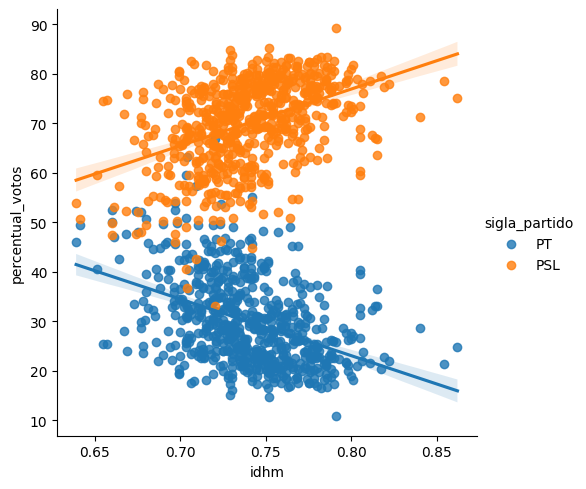

In [10]:
sns.lmplot(x='idhm', y='percentual_votos', hue='sigla_partido', data=df)

# Realizando a regressão linear simples
model = smf.ols(formula='percentual_votos ~ idhm', data=df)
results = model.fit()
print(results.summary())

In [5]:
query = '''
SELECT
  a.sigla_partido,
  a.id_municipio,
  sum(a.votos) AS total_votos,
  (sum(a.votos) / SUM(total_votos_municipio.total_votos) * 100) AS percentual_votos,
  b.idhm,
FROM
  `basedosdados.br_tse_eleicoes.resultados_candidato_municipio` a
INNER JOIN `basedosdados.mundo_onu_adh.municipio` b
ON a.id_municipio = b.id_municipio AND b.ano = 2010
INNER JOIN (
  SELECT
    id_municipio,
    sum(votos) AS total_votos
  FROM
    `basedosdados.br_tse_eleicoes.resultados_candidato_municipio`
  WHERE
    ano = 2022 AND cargo = 'presidente' AND turno = 2 AND sigla_uf = 'SP'
  GROUP BY
    id_municipio
) AS total_votos_municipio
ON a.id_municipio = total_votos_municipio.id_municipio
WHERE
  a.ano = 2022 AND cargo = 'presidente' AND turno = 2 AND sigla_uf = 'SP'
GROUP BY
  a.sigla_partido, a.id_municipio, b.idhm
'''
df = bd.read_sql(query, billing_project_id='basedosdados-dev')

Downloading: 100%|██████████| 1290/1290 [00:00<00:00, 4908.42rows/s]


                            OLS Regression Results                            
Dep. Variable:       percentual_votos   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               1.00
Time:                        17:52:51   Log-Likelihood:                -5058.0
No. Observations:                1290   AIC:                         1.012e+04
Df Residuals:                    1288   BIC:                         1.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.0000      7.758      6.445      0.0

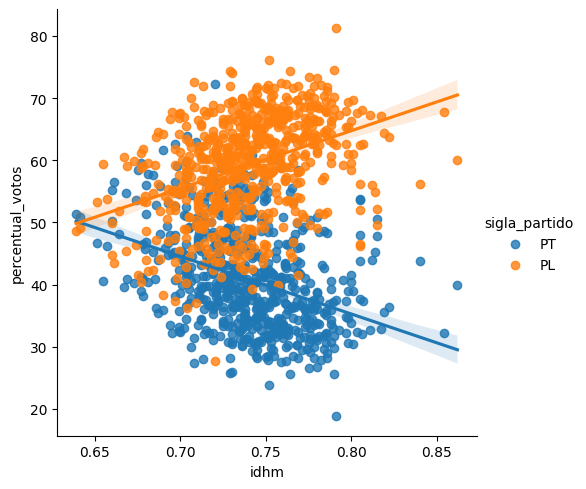

In [8]:
sns.lmplot(x='idhm', y='percentual_votos', hue='sigla_partido', data=df)

# Realizando a regressão linear simples
model = smf.ols(formula='percentual_votos ~ idhm', data=df)
results = model.fit()
print(results.summary())